# Nettoyage et analyse de données

## Contexte 

On prétend traiter les données d'un commerce (une librairie) qui souhaite développer son offre de vente en ligne. Il s'agit de traiter les données issues de divers fichiers (tableurs), afin de fournir une analyse. 


## Attendus 

Les collègues imaginés dans le cadre de l'exercice réclament:

>Une __analyse des différents indicateurs__ :
- différents indicateurs et graphiques autour du __chiffre d'affaires__, avec notamment l’__évolution dans le temps__.
- Un __zoom sur les références__, pour voir un peu les tops et les flops, la répartition par catégorie, etc.
- Informations sur les __profils des clients__, et également la répartition du chiffre d'affaires entre eux, via par exemple une courbe de Lorenz.

>Une __analyse plus ciblée sur les clients__ : l’objectif serait cette fois-ci de comprendre le comportement de nos clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via nos librairies physiques. 
- le lien entre le __genre d’un client et les catégories des livres achetés__ ;
 
- le lien entre l’__âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés__.

- des éclaircisseemnts sur une éventuelle relation entre deux ouvrages, par le calcul de la __probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159__.

# Sommaire
<a id='Sommaire'></a>
- Données en entrée

    - [Fichier clients](#fichier_clients)
    - [Fichier produits](#fichier_produits)
    - [Fichier transactions](#fichier_transactions)
    - [Fichier unique data](#fichier_data)
    
    
- Indicateurs de vente

    - [Evolution du CA dans le temps](#CA_dans_le_temps)
    - [Evolution du CA dans le temps par catégorie](#CA_temps_categ)
    

- Les produits

    - [Repartition dans le catalogue](#catalogue)
    - [Repartition des prix par catégorie](#prix_categ)
    - [Meilleures et pires ventes](#meilleures_pires_ventes)
    - [Les références invendues](#invendus)
    
    
- Profils clients

    - [Répartition par âge et genre](#age_et_genre)
    - [Genre et catégorie d'achat](#sexe_et_categ_achat)
    - [Répartition par âge](#repartition_par_age)
    - [Age et catégorie de produits préférées](#age_et_categ_achat)
    - [Age et montant d'achat](#age_et_montant)
    - [Age et frequence d'achat](#age_et_freq_achat)
    - [Age et panier](#age_et_panier)
    - [Répartition du CA entre les catégories de clients](#CA_par_categ_client)
    
    
- [Probabilité d'achat](#probabilite)

- [Conclusion et préconisations](#conclusion)


In [1]:
import pandas as pd

# Données en entrée

### Fichier clients
<a id='fichier_clients'></a>
[Sommaire](#Sommaire)

In [2]:
# Import du fichier "customers"
filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 6/DAN-P6-donnees/customers.csv'
clients = pd.read_csv(filepath)

#Vérification du fichier:
#clients.head()
#clients.sample(7)
#clients.info()

Le df clients ne contient pas de valeur null. 

Pour répondre aux questions posées, nous allons créer la __colonne âge__. 

In [3]:
# On crée la colonne 'Age' en déduisant l'année de naissance de l'année en cours. 
import datetime
année= datetime.datetime.now().year
clients=clients.assign(age = année - clients.birth)

In [4]:
clients.age.describe()

count    8623.000000
mean       42.719123
std        16.919535
min        17.000000
25%        29.000000
50%        42.000000
75%        55.000000
max        92.000000
Name: age, dtype: float64

Pour faciliter la lecture, nous allons __segmenter les âges en catégories__.

In [5]:
#Segmentation en catégories d'âge
clients['categ_age']=pd.cut(clients.age,bins=[0,19,29,39,49,59,69,79,89,99]
       ,labels=['Moins de 20'
                ,'Vingtenaire'
                ,'Trentenaire'
                ,'Quadragénaire'
                ,'Quinquagénaire'
                ,'Sexagénaire'
                ,'Septuagénaire'
                ,'Octogénaire'
                ,'Nonagénaire'
               ])

In [6]:
# Vérification

clients[clients.categ_age.isnull()].age.value_counts()

Series([], Name: age, dtype: int64)

In [7]:
# Observation d'un échantillon

clients.sample(7)

,client_id,sex,birth,age,categ_age
8077,c_6654,m,1946,75,Septuagénaire
4296,c_1865,m,1994,27,Vingtenaire
7401,c_7708,m,1988,33,Trentenaire
5989,c_816,f,1979,42,Quadragénaire
1438,c_5181,m,1962,59,Quinquagénaire
274,c_4631,f,1939,82,Octogénaire
6907,c_4335,m,1959,62,Sexagénaire


In [8]:
clients.categ_age.value_counts('normalize')

Quadragénaire     0.199003
Trentenaire       0.191349
Vingtenaire       0.179752
Quinquagénaire    0.164560
Sexagénaire       0.113418
Moins de 20       0.084889
Septuagénaire     0.046967
Octogénaire       0.018787
Nonagénaire       0.001276
Name: categ_age, dtype: float64

In [9]:
# On vérifie la présence de doublons

if clients.duplicated(subset=None, keep='first').sum()== 0:
    print('Pas de doublons.')
else:
    print('Il y avait ',clients.duplicated(subset=None, keep='first').sum(),'doublons.')
    clients.drop_duplicates(inplace= True)
    print('Ils ont été supprimés.')


Pas de doublons.


### Fichier produits
<a id='fichier_produits'></a>
[Sommaire](#Sommaire)

In [10]:
# Import du fichier "products"

filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 6/DAN-P6-donnees/products.csv'
produits = pd.read_csv(filepath)

In [11]:
# Observation d'un échantillon

produits.sample(7)

,id_prod,price,categ
1863,1_394,39.73,1
566,0_1348,12.03,0
698,0_1338,9.28,0
1610,0_841,19.99,0
645,0_1871,1.99,0
879,1_679,79.99,1
1246,0_1565,7.99,0


In [12]:
# Vérification des informations

produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [13]:
produits.categ.value_counts()

0    2309
1     739
2     239
Name: categ, dtype: int64

In [14]:
produits.price.describe()

count    3287.000000
mean       21.856641
std        29.847908
min        -1.000000
25%         6.990000
50%        13.060000
75%        22.990000
max       300.000000
Name: price, dtype: float64

En observant les prix, on constate qu'il y a __un tarif négatif__.

In [15]:
produits.query('price < 0')

,id_prod,price,categ
731,T_0,-1.0,0


Le 'T' qui démarre l'id_prod nous incite à penser qu'il s'agit  d'une valeur test. 

In [16]:
produits.id_prod.apply(lambda d : d[:1]).value_counts()

0    2308
1     739
2     239
T       1
Name: id_prod, dtype: int64

On supprime cette variable de test.  

In [17]:
produits=produits.query('price>=0')
produits.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3286 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3286 non-null   object 
 1   price    3286 non-null   float64
 2   categ    3286 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 102.7+ KB


In [18]:
# On vérifie la présence de doublons 

if produits.duplicated(subset=None, keep='first').sum()== 0:
    print('Pas de doublons.')
else:
    print('Il y avait ',produits.duplicated(subset=None, keep='first').sum(),'doublons.')
    produits.drop_duplicates(inplace= True)
    print('Ils ont été supprimés.')

Pas de doublons.


### Fichier transactions
<a id='fichier_transactions'></a>
[Sommaire](#Sommaire)

In [19]:
# On importe le fichier "transactions"

filepath='/Users/oliviavolpi/MOOC/OpenClassroom-DataAnalyst/OpenClassroom- Projet 6/DAN-P6-donnees/transactions.csv'
transac = pd.read_csv(filepath,parse_dates=['date'])

In [20]:
# On vérifie la présence de doublons:

if transac.duplicated(subset=None, keep='first').sum()== 0:
    print('Pas de doublons.')
else:
    print('Il y avait ',transac.duplicated(subset=None, keep='first').sum(),'doublons.')
    transac.drop_duplicates(inplace= True)
    print('Ils ont été supprimés.')

Il y avait  126 doublons.
Ils ont été supprimés.


In [21]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679406 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679406 non-null  object
 1   date        679406 non-null  object
 2   session_id  679406 non-null  object
 3   client_id   679406 non-null  object
dtypes: object(4)
memory usage: 25.9+ MB


On note que malgré l'usage de __parse_dates__ dans l'import du fichier, le format de la colonne 'date' n'est pas 'datetime'. Cela indique que les formats de certaines valeurs de cette colonne ne sont pas sous la forme de date. 

In [22]:
# On vérifie les premiers caractères des valeurs de la colonne 'date'. 

transac.date.apply(lambda d : d[:4]).value_counts()

2022    346500
2021    278335
2023     54497
test        74
Name: date, dtype: int64

Il y a des __dates situées dans le futur (2022, 2023)__: faut-il les considérer comme des erreurs ?

Après vérification du nombre de dates par année, on considère que les dates situées dans le futur sont sans doute __un choix d'OpenClassroom__ pour ne pas avoir à mettre à jour le fichier avant plusieurs années. Nous allons donc traiter les informations comme correctes. 

On constate par ailleurs l'existence de __dates de test__. 

In [23]:
# Vérifier le nombre de dates contenant le mot  "test"
print('avant:',transac.date.str.contains("test").sum())

# Supprimer ces lignes 
transac=transac[transac.date.str.contains("test")==False]

# Vérifier l'effet de la suppression
print('après:',transac.date.str.contains("test").sum())

avant: 74
après: 0


On constate que le format de la colonne date ne convient pas: c'est un __type object, et non datetime__. 

In [24]:
# Changer le format 'object' de la date en 'datetime'

transac.date =pd.to_datetime(transac.date)

# Vérifier l'effet de la modification
transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 25.9+ MB


Pour répondre aux questions, il n'est __pas nécessaire de disposer de l'heure exacte de l'achat__: le jour suffit. on crée donc une colonne avec ce format de date. 

Pour faciliter la lecture, la colonne originale 'date' est renommée 'date_time', et la nouvelle colonne 'date'. 

In [25]:
transac.rename(columns={'date':'date_time'},inplace=True)
transac['date'] =pd.to_datetime(transac.date_time).dt.date
transac.sample(7)

,id_prod,date_time,session_id,client_id,date
217717,0_1375,2021-03-03 07:59:14.434315,s_1107,c_3454,2021-03-03
241398,0_1386,2021-12-27 00:38:51.846619,s_140569,c_1609,2021-12-27
296385,1_507,2023-01-19 12:39:19.237850,s_329225,c_4874,2023-01-19
200698,0_1395,2022-04-04 07:18:09.497360,s_189037,c_7782,2022-04-04
199137,0_1013,2021-09-07 18:51:25.552712,s_86460,c_1212,2021-09-07
240210,0_1367,2021-11-13 18:02:11.368560,s_119136,c_13,2021-11-13
410974,0_675,2022-11-30 23:58:02.720558,s_305288,c_1057,2022-11-30


In [26]:
# Verification du format
print ('format de la nouvelle colonne:',transac.date.dtype)
transac.date =pd.to_datetime(transac.date)
print ('format de la nouvelle colonne après modification:',transac.date.dtype)

format de la nouvelle colonne: object
format de la nouvelle colonne après modification: datetime64[ns]


In [27]:
transac['date_year'] = transac['date'].dt.strftime('%Y')
transac['date_month'] = transac['date'].dt.strftime('%Y-%m')
transac['date_month_format'] = transac['date'].dt.strftime('%Y-%B')

In [28]:
transac.head()

,id_prod,date_time,session_id,client_id,date,date_year,date_month,date_month_format
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,2022-05-20,2022,2022-05,2022-May
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,2022-02-02,2022,2022-02,2022-February
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,2022-06-18,2022,2022-06,2022-June
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,2021-06-24,2021,2021-06,2021-June
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,2023-01-11,2023,2023-01,2023-January


In [29]:
# On vérifie la présence de doublons:
if transac.duplicated(subset=None, keep='first').sum()== 0:
    print('Pas de doublons.')
else:
    print('Il y avait ',transac.duplicated(subset=None, keep='first').sum(),'doublons.')
    transac.drop_duplicates(inplace= True)
    print('Ils ont été supprimés.')

Pas de doublons.


### Création d'un dataframe unique à partir des fichiers d'entrée
<a id='fichier_data'></a>
[Sommaire](#Sommaire)

In [30]:
# réunir les df transac (avec les ventes) à produits (avec les prix) et  grâce à id_prod, et à clients 
# (sexe, âge) avec client_id.
# Jointure inner pour ne garder que les produits communs.
data= (transac
       .merge(produits, how='inner',on="id_prod")
       .merge(clients, how='inner',on="client_id")
      )
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679111 entries, 0 to 679110
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   id_prod            679111 non-null  object        
 1   date_time          679111 non-null  datetime64[ns]
 2   session_id         679111 non-null  object        
 3   client_id          679111 non-null  object        
 4   date               679111 non-null  datetime64[ns]
 5   date_year          679111 non-null  object        
 6   date_month         679111 non-null  object        
 7   date_month_format  679111 non-null  object        
 8   price              679111 non-null  float64       
 9   categ              679111 non-null  int64         
 10  sex                679111 non-null  object        
 11  birth              679111 non-null  int64         
 12  age                679111 non-null  int64         
 13  categ_age          679111 non-null  category

Nous disposons désormais d'un dataframe 'data', qui contient 14 colonnes, et dont __chaque ligne décrit un achat réalisé par un de nos clients entre 2021 et 2023.__ 

Les variables qui le constituent sont:
- qualitatives
    - id_prod;
    - session_id;
    - client_id;
    - categ;
    - sex;
    - age;
    - categ-age;


- qualitatives relatives à une date:
    - date_time;
    - date;
    - date_year;
    - date_month;
    - date_month_format;
    - birth
    
    
- quantitatives:
    - price. 

In [31]:
data.sample(7)

,id_prod,date_time,session_id,client_id,date,date_year,date_month,date_month_format,price,categ,sex,birth,age,categ_age
401107,0_2274,2021-09-23 03:01:31.999219,s_94042,c_384,2021-09-23,2021,2021-09,2021-September,5.91,0,m,1977,44,Quadragénaire
291068,0_1121,2022-11-23 15:15:30.504020,s_301656,c_110,2022-11-23,2022,2022-11,2022-November,19.99,0,m,1975,46,Quadragénaire
143909,0_1876,2021-03-14 23:07:28.878250,s_6401,c_4487,2021-03-14,2021,2021-03,2021-March,12.85,0,f,1960,61,Sexagénaire
424230,0_1626,2022-05-02 02:26:10.699449,s_202346,c_6850,2022-05-02,2022,2022-05,2022-May,14.02,0,f,1987,34,Trentenaire
367484,1_388,2022-02-28 12:46:34.451332,s_172192,c_7767,2022-02-28,2022,2022-02,2022-February,16.70,1,f,1960,61,Sexagénaire
654099,0_1777,2022-01-02 07:27:55.468973,s_143764,c_8445,2022-01-02,2022,2022-01,2022-January,18.99,0,f,1987,34,Trentenaire
175534,0_1357,2021-06-17 08:07:42.494438,s_49794,c_3025,2021-06-17,2021,2021-06,2021-June,15.99,0,m,1987,34,Trentenaire


In [32]:
if data.duplicated(subset=None, keep='first').sum()== 0:
    print('Pas de doublons.')
else:
    print('Il y avait ',data.duplicated(subset=None, keep='first').sum(),'doublons.')
    data.drop_duplicates(inplace= True)
    print('Ils ont été supprimés.')

Pas de doublons.


# Indicateurs de vente

## Evolution dans le temps du chiffre d'affaire

<a id='CA_dans_le_temps'></a>
[Sommaire](#Sommaire)

In [33]:
# Création d'un dataframe CA, qui fait la somme des ventes par mois
CA_df=data.groupby(by='date_month').sum('price')
#CA_df.sample(7)

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

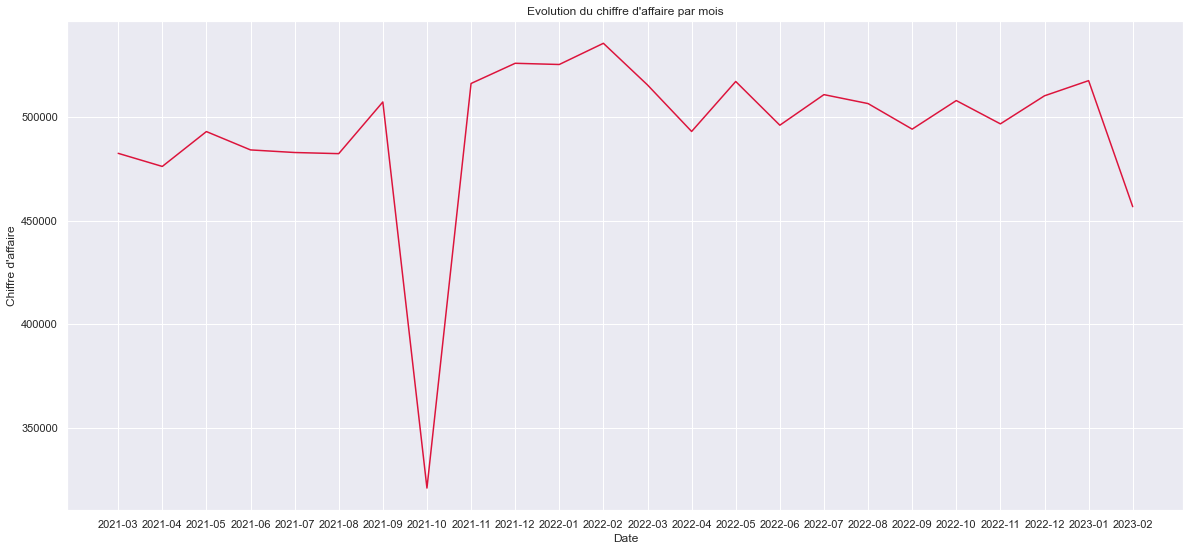

In [35]:
plt.figure(figsize=(20,9))

sns.lineplot(data=CA_df
             ,x='date_month'
             ,y='price'
             ,color='crimson'
            )

plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaire')
plt.title('Evolution du chiffre d\'affaire par mois')
plt.show()

Sur la période, le chiffre d'affaire __se maintient entre 14 000 et 20 000 €__ par jour. 

Cependant, on constate __une baisse très nette du chiffre d'affaire__ en octobre 2021, où le chiffre d'affaire se situe entre 8 000 et 10 000 € quotidiens.  


## Evolution du chiffre d'affaire par catégorie

<a id='CA_temps_categ'></a>
[Sommaire](#Sommaire)

In [36]:
# Création d'un nouveau dataframe, qui fait la somme des ventes par jour et par catégorie
CA_categ_df=data.groupby(by=['date_month','categ']).sum('price')
CA_categ_df

price     birth     age
date_month categ                             
2021-03    0      193629.17  35866261  776490
           1      186974.17  18035620  424194
           2      101837.27   2666359   33697
2021-04    0      205222.46  38263081  827101
           1      156138.35  14962506  354653
...                     ...       ...     ...
2023-01    1      210104.41  20240270  479022
           2      126153.08   3230609   39369
2023-02    0      162457.00  30174402  655953
           1      180347.24  17353680  408889
           2      113875.52   2995325   38196

[72 rows x 3 columns]

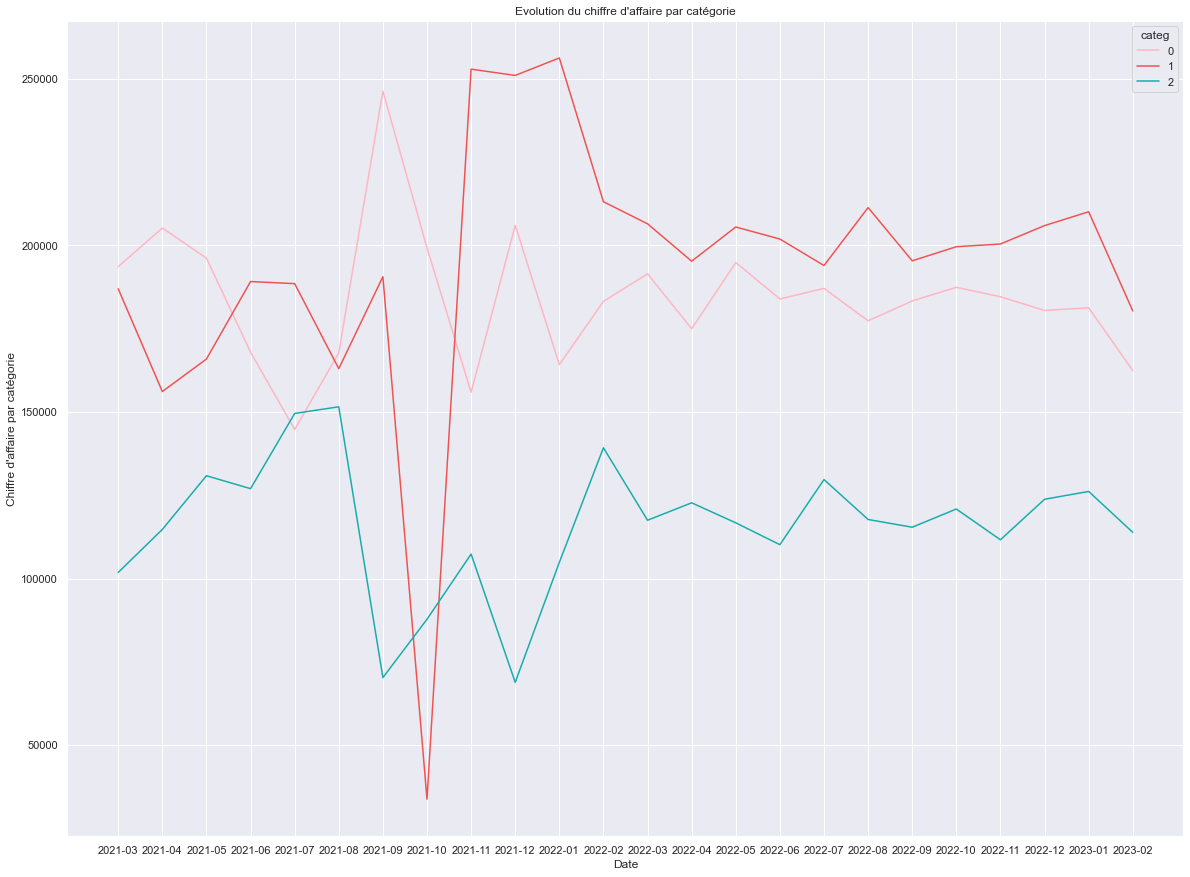

In [37]:
plt.figure(figsize=(20,15))

sns.lineplot(data=CA_categ_df
             ,x='date_month'
             ,y= 'price'
             ,hue='categ'
             ,palette=['#ffb6c1',"#ef5350",'#16adaa']
            )

plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaire par catégorie')
plt.title('Evolution du chiffre d\'affaire par catégorie')
plt.show()

On observant plus en détail, on constate que la baisse globale du chiffre d'affaire en __octobre 2021__ correspond en fait principalement à une __baisse des vente de la catégorie 1__, tandis que les autres catégories connaissent des __fluctuations modérées__ à la même période. 

Notons que cette baisse subite des ventes de la catégorie 1 a été __immédiatement suivie d'une remontée des ventes__ de cette catégorie. 



## Les produits
<a id='produits'></a>


### Dans le catalogue
<a id='catalogue'></a>
[Sommaire](#Sommaire)

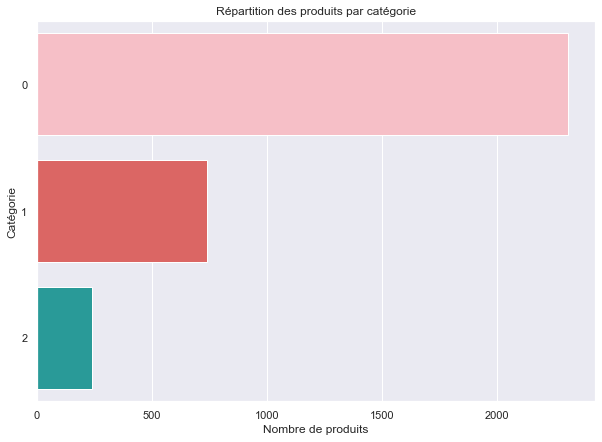

In [38]:
# Les catégories
plt.figure(figsize=(10,7))
sns.countplot(y='categ', data=produits, palette=['#ffb6c1',"#ef5350",'#16adaa'])
plt.xlabel('Nombre de produits')
plt.ylabel('Catégorie')
plt.title('Répartition des produits par catégorie')
plt.show()

Dans le __catalogue__, l'offre la plus importante est celle des __produits de catégorie 0__, suivie de loin par celle des produits de catégorie 1, puis des livres de la catégorie 2. 

L'offre de produits de catégorie zéro est __supérieure à l'offre cumulée des deux autres catégories__. 

### Prix par catégorie
<a id='prix_categ'></a>
[Sommaire](#Sommaire)

<AxesSubplot:xlabel='categ', ylabel='price'>

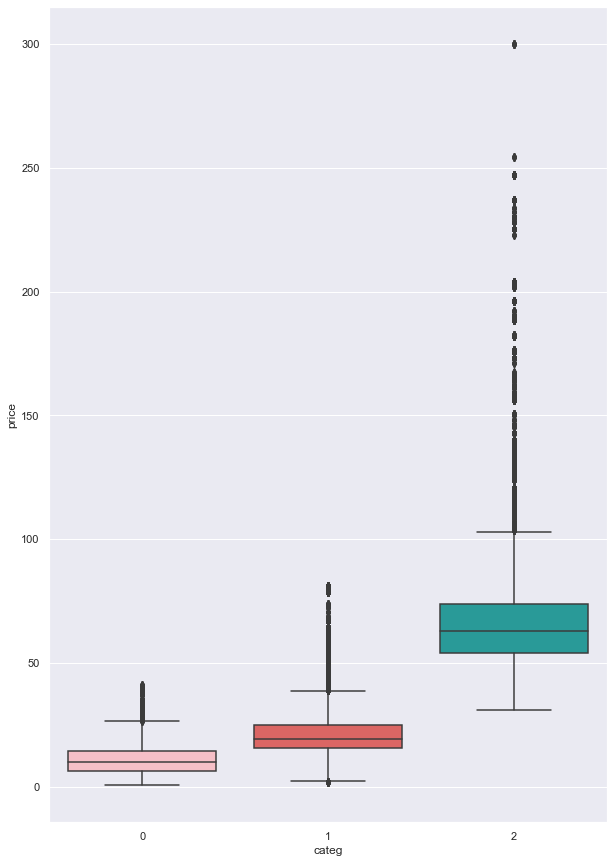

In [39]:
plt.figure(figsize=(10,15))
sns.boxplot(x = 'categ'
            , y = 'price'
            , data = data
            ,palette=['#ffb6c1',"#ef5350",'#16adaa']
            #, showfliers = False
           )

Pour faciliter la lecture, observons la même distribution des prix, mais  sans tenir compte des outliers. 

<AxesSubplot:xlabel='categ', ylabel='price'>

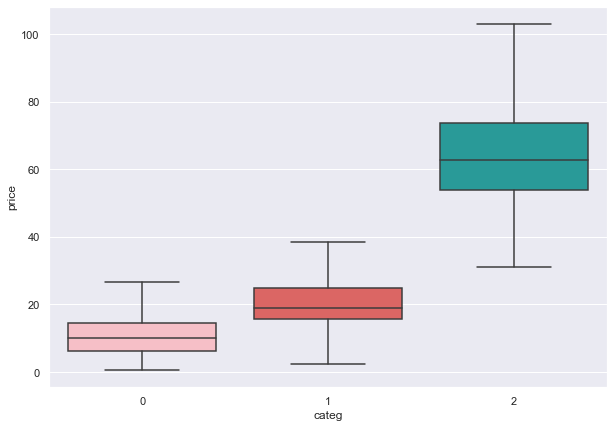

In [40]:
plt.figure(figsize=(10,7))
sns.boxplot(x = 'categ'
            , y = 'price'
            , data = data
            ,palette=['#ffb6c1',"#ef5350",'#16adaa']
            , showfliers = False
           )

On constate que les __catégories se distinguent nettement par le prix de leurs produits__.

Les produits de catégorie zéro sont globalement plus bas que ceux de la catégorie 1, eux-mêmes inférieurs à ceux de la catégorie 2. 

En particulier, les prix de certains produits de la catégorie 2 atteignent les 300 €, alors que les prix maximum des deux autres catégories n'atteignent pas les 100 €. 

### Meilleures et pires ventes
<a id='meilleures_pires_ventes'></a>
- [Sommaire](#Sommaire)

In [41]:
# Meilleures ventes, toutes catégories confondues, sur l'ensemble de la période
ventes=data.groupby(['id_prod']).count()
ventes.sort_values(by='client_id', ascending= False,inplace= True)
print('Les 5 références les plus vendues sont ',' ,'.join(ventes.index[:5].to_list()))

Les 5 références les plus vendues sont  1_369 ,1_417 ,1_414 ,1_498 ,1_425


Notons que toutes ces références commencent par le chiffre 1: cela signifie que __les 5 meilleures ventes sont des produits de la catégorie 1__. 

In [42]:
# On crée un dataframe qui compte, pour chaque mois, le nombre de ventes de chaque produit.  
ventes=data.groupby(['id_prod','date_month','categ']).count()
#ventes.head()

Observons les références __par catégorie__ de livre. 

In [43]:
categ_0=(data
         .query('categ == 0')
         .groupby(['id_prod']).count()
        )
categ_0.sort_values(by='client_id', ascending= False,inplace= True)
#
categ_1=(data
         .query('categ == 1')
         .groupby(['id_prod']).count()
        )
categ_1.sort_values(by='client_id', ascending= False,inplace= True)
#
categ_2=(data
         .query('categ == 2')
         .groupby(['id_prod']).count()
        )
categ_2.sort_values(by='client_id', ascending= False,inplace= True)

In [44]:
print('Le livre le plus vendu de la catégorie 0 est '
      ,categ_0.index[0]
      , ',il s\'est écoulé à'
      ,categ_0.date_time.max()
      ,'exemplaires.'
     )
print('Le livre le plus vendu de la catégorie 1 est '
      ,categ_1.index[0]
      , ',il s\'est écoulé à'
      ,categ_1.date_time.max()
      ,'exemplaires.'
     )
print('Le livre le plus vendu de la catégorie 2 est '
      ,categ_2.index[0]
      , ',il s\'est écoulé à'
      ,categ_2.date_time.max()
      ,'exemplaires.'
     )

Le livre le plus vendu de la catégorie 0 est  0_1422 ,il s'est écoulé à 1292 exemplaires.
Le livre le plus vendu de la catégorie 1 est  1_369 ,il s'est écoulé à 2252 exemplaires.
Le livre le plus vendu de la catégorie 2 est  2_102 ,il s'est écoulé à 1027 exemplaires.


In [45]:
print('Les livres les moins vendus de la catégorie 0 se sont écoulés à '
      ,categ_0.date_time.min()
      ,'exemplaire(s).'
     )
print('Les livres les moins vendus de la catégorie 1 se sont écoulés à '
      ,categ_1.date_time.min()
      ,'exemplaire(s).'
     )
print('Les livres les moins vendus de la catégorie 2 se sont écoulés à '
      ,categ_2.date_time.min()
      ,'exemplaire(s).'
     )

Les livres les moins vendus de la catégorie 0 se sont écoulés à  1 exemplaire(s).
Les livres les moins vendus de la catégorie 1 se sont écoulés à  2 exemplaire(s).
Les livres les moins vendus de la catégorie 2 se sont écoulés à  1 exemplaire(s).


Les __ventes de la catégorie 1 se distinguent__ nettement des ventes des autres catégories: 

- les livres qui se sont sont le moins vendus dans cette catégorie se sont écoulés à au moins 2 exemplaires, contre un seul pour les catégories zéro et 2; 

- les meilleures ventes de la catégorie 1 sont environ deux fois supérieures à celles des meilleures ventes des catégories zéro et 2. 

### Les invendus
<a id='invendus'></a>
[Sommaire](#Sommaire)

Observons les livres qui __ne se sont pas vendus du tout en deux ans__.

In [46]:
pas_vendus=produits.query('id_prod not in @data.id_prod')
pas_vendus=pas_vendus.sort_values(by='id_prod')
print('Voici la liste des'
      ,pas_vendus.id_prod.nunique()
      ,'produits qui ne se sont pas vendus du tout en deux ans:' )
', '.join(pas_vendus.id_prod.to_list())

Voici la liste des 21 produits qui ne se sont pas vendus du tout en deux ans:


'0_1014, 0_1016, 0_1025, 0_1062, 0_1119, 0_1318, 0_1620, 0_1624, 0_1645, 0_1780, 0_1800, 0_2308, 0_299, 0_310, 0_322, 0_510, 1_0, 1_394, 2_72, 2_86, 2_87'

On constate que __très peu__ de produits du catalogue __n'ont pas trouvé leur public__.

Parmi ces références, l'essentiel appartient à la __catégorie 0__, celle dont les prix moyens sont les plus bas, et qui n'est pas la préférée de nos catégories principales d'acheteurs. 

Ces _"erreurs de casting"_ sont donc __négligeables__. 

# Profils des clients
[Sommaire](#sommaire)

Concernant les clients, on dispose d'informations sur :
- leur âge;
- leur genre.

In [47]:
import seaborn as sns
import pandas as pd

### Répartition des clients par âge et genre
[Sommaire](#Sommaire)
<a id='age_et_genre'></a>

In [48]:
# Dataframe pour compter le nombre de clients par catégorie d'âge et de genre. 
profils= data.pivot_table(index=['sex','categ_age']
                          ,values= 'client_id'
                          ,aggfunc='nunique'
                          #,aggfunc= lambda x: len(x.unique())
                          # liste de client_id sexe/catégorie d'âge donnée;
                          # .unique "dédoublonne" les client_id;
                          # len compte la liste dédoublonnée
                          ,margins= True
                         )
profils

client_id
sex categ_age                
f   Moins de 20           361
    Vingtenaire           818
    Trentenaire           834
    Quadragénaire         899
    Quinquagénaire        731
    Sexagénaire           506
    Septuagénaire         222
    Octogénaire           102
    Nonagénaire             6
m   Moins de 20           366
    Vingtenaire           722
    Trentenaire           816
    Quadragénaire         817
    Quinquagénaire        685
    Sexagénaire           467
    Septuagénaire         183
    Octogénaire            60
    Nonagénaire             5
All                      8600

<Figure size 720x1080 with 0 Axes>

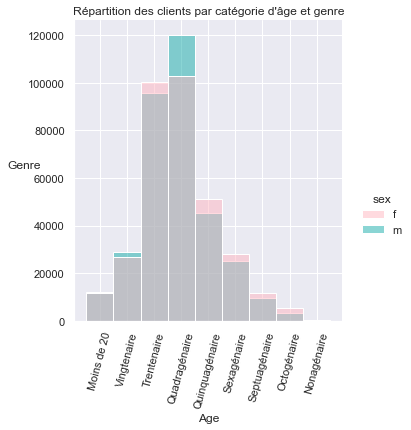

<Figure size 720x720 with 0 Axes>

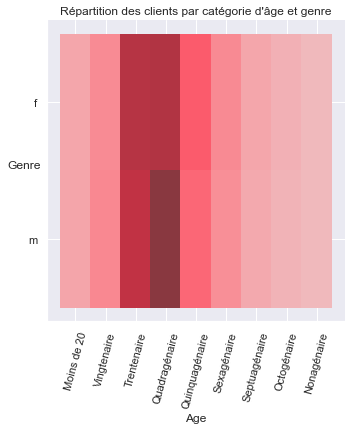

In [49]:
# Histogrammes présentant la répartition des clients par catégorie d'âge et genre. 

plt.figure(figsize=(10,15))
sns.displot(data,x='categ_age',hue='sex',palette=['#ffb6c1','#16adaa'])
plt.ylabel('Genre',rotation=0)
plt.xlabel('Age')
plt.title('Répartition des clients par catégorie d\'âge et genre')
plt.xticks(rotation=75)
plt.show()

plt.figure(figsize=(10,10))
sns.displot(data,x='categ_age',y='sex',color='crimson')
plt.ylabel('Genre',rotation=0)
plt.xlabel('Age')
plt.title('Répartition des clients par catégorie d\'âge et genre')
plt.xticks(rotation=75)
plt.show()

On constate qu'il y a une répartition __relativement homogènes des hommes et des femmes__ dans la clientèle de la librairie, avec toutefois,  __parfois un peu plus de femmes, parfois un peu plus d'hommes__ : la différence est surtout notable pour les __hommes quadragénaires__ plus nombreux que les femmes du même âge. 

On constate une __nette prédominance des trentenaires et quadragénaires__. 

### Sexe et catégorie d'achat
<a id='sexe_et_categ_achat'></a>
[Sommaire](#Sommaire)

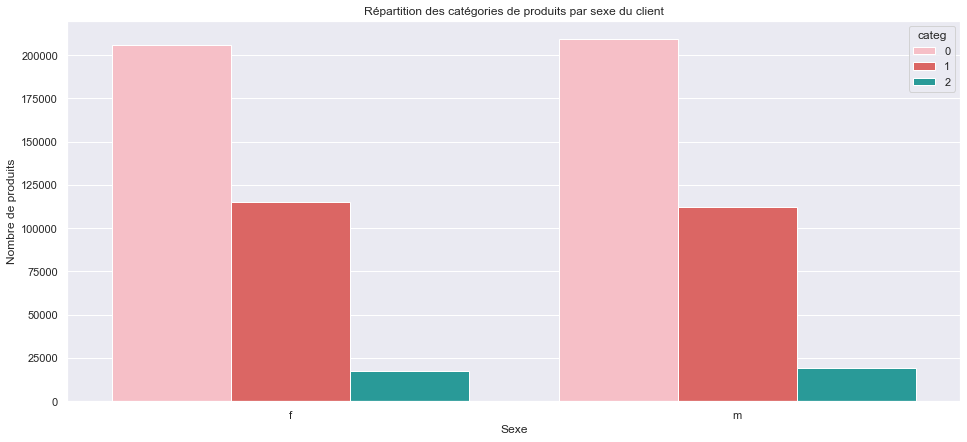

In [50]:
### Set figure size
plt.figure(figsize=(16,7))
##Plot the graph
sns.countplot(x='sex',data = data, hue = 'categ',palette=['#ffb6c1',"#ef5350",'#16adaa'])
plt.xlabel('Sexe')
plt.ylabel('Nombre de produits')
plt.title('Répartition des catégories de produits par sexe du client')
plt.show()

A vue d'oeil, les hommes et femmes clients de la librairie __ne se distinguent pas par les catégories de produits__ qu'ils préfèrent. 

Pour le vérifier, on va appliquer à ces données le test du Chi2.

In [71]:
CA_clients.columns

Index(['price', 'price_percent', 'client_id', 'pop_percent', 'sommes_cumul',
       'price_percent_cumul', 'pop_cumul'],
      dtype='object')

In [80]:
from scipy.stats import chi2_contingency 
import numpy as np

# On crée une table de contingence
chisqt = pd.crosstab(data.sex, data.categ, margins=True)
print(chisqt)
print()
value = np.array([chisqt.iloc[0][0:5].values,
                  chisqt.iloc[1][0:5].values])
print("p value: " + str(p))
print()
significance_level = 0.05
print('Doit-on accepter l\'hypothèse nulle? ',p<significance_level)

categ       0       1      2     All
sex                                 
f      206103  114899  17283  338285
m      209356  112270  19200  340826
All    415459  227169  36483  679111

p value: 1.1020397770492305e-31

Doit-on accepter l'hypothèse nulle?  True


L'application du __test du Chi2__ confirme qu'il n'y a __pas de lien__ entre le genr edes clients et leurs catégories de livres préférées. 

### Répartition des clients par âge
<a id='repartition_par_age'></a>
[Sommaire](#Sommaire)

Observons tout d'abord la  __répartition des clients par âge__. 

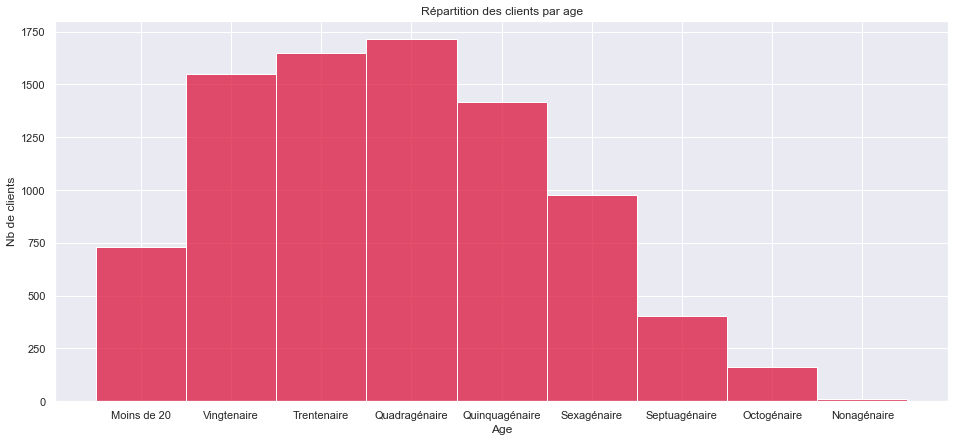

In [51]:
plt.figure(figsize=(16,7))
sns.histplot(x='categ_age', data=clients,color = 'crimson')
plt.xlabel('Age')
plt.ylabel('Nb de clients')
plt.title('Répartition des clients par age')
plt.show()

La __majorité__ de la clientèle a __entre 20 et 49 ans__.

### Age et catégorie de produits préférée
<a id='age_et_categ_achat'></a>
[Sommaire](#Sommaire)

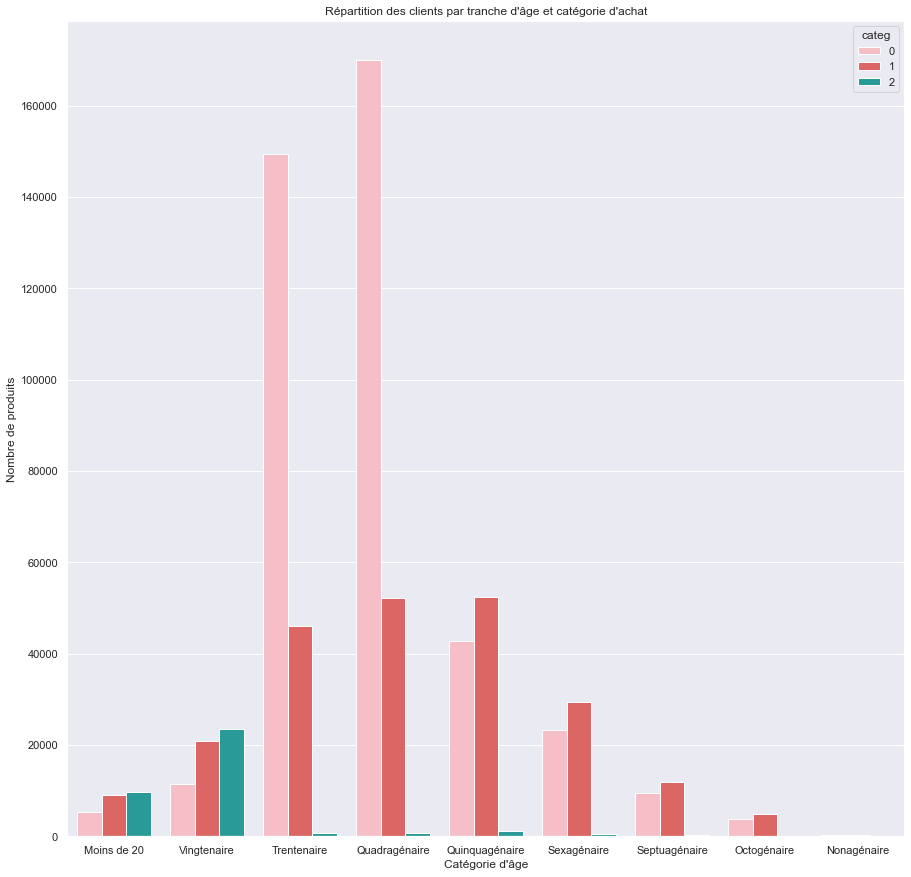

In [52]:
# On compte le nombre de produits achetés par tranche d'age, subdivisés par catégorie de produits. 

### Set figure size
plt.figure(figsize=(15,15))
##Plot the graph
sns.countplot(x='categ_age',data = data, hue = 'categ',palette=['#ffb6c1',"#ef5350",'#16adaa'])
plt.xlabel('Catégorie d\'âge')
plt.ylabel('Nombre de produits')
plt.title('Répartition des clients par tranche d\'âge et catégorie d\'achat')
plt.show()

On constate que les __trentenaires et quadragénaires__ sont les principaux consommateurs de produits de __catégorie 0__, tandis que les __moins de 30 ans__ sont les principaux consommateurs de produits de __catégorie 2__. 

### Age et montant des achats
<a id='age_et_montant'></a>
[Sommaire](#Sommaire)

In [53]:
# Somme des achats par session d'achat et par catégorie d'âge
age_montant=data.groupby(['session_id','categ_age']).sum('price')
age_montant=age_montant.query('price > 0')

# Moyenne d'achat par session pour les catégorie d'âge
age_montant=age_montant.groupby('categ_age').mean('price')

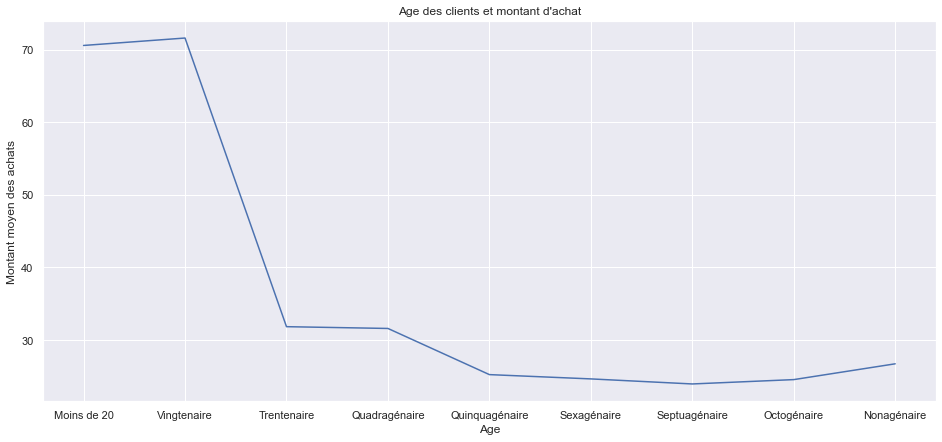

In [54]:
plt.figure(figsize=(16,7))
sns.lineplot(x='categ_age',y= 'price', data=age_montant)
plt.xlabel('Age')
plt.ylabel('Montant moyen des achats')
plt.title('Age des clients et montant d\'achat')
plt.show()

Pour confirmer ce que nous voyons avec ce graphique, on applique le test de __corrélation de Pearson__, cette fois aux âges non rasemblés en catégories. 

In [88]:
from scipy.stats import pearsonr

# Somme des achats par session d'achat et par âge
test_pearson=data.groupby(['session_id','age']).sum('price')
test_pearson=test_pearson.query('price > 0')

# Moyenne d'achat par session pour les catégorie d'âge
test_pearson=test_pearson.groupby('age').mean('price')

# Création de deux series
list1 = test['price']
list2 = test.index
  
# Appication de la fonction paersonr()
corr, _ = pearsonr(list1, list2)
print('Correlation: %.3f' % corr)
if corr > 1:
    print('Cela indique que le montant moyen des achats croît avec l\'age')
else:
    print('Cela indique que le montant moyen des achats décroît avec l\'age')

Correlation: -0.746
Cela indique que le montant des achats décroît avec l'age


Le __montant moyen d'achat décroit avec l'age__. 

On constate que:
- les clients __de moins de 30 ans__ sont ceux dont les __montants moyens d'achat sont les plus elevés__, autour de 70€; 

- les __trentenaires et quadragénaires__, qui représentent le gros de la clientèle, ont un panier moyen de __moins de 35€__. 

- pour les catégories d'âge les plus âgés, les montants moyens vont en décroissant, avec une __exception pour les nonagénaires__, dont les montants moyens varient plus que ceux des autres catégories d'âge (oscillant dans une fourchette de 25 à 30€, quand les autres catégories ont une fourchette à peine perceptible). 

## Age et  fréquence d’achat
<a id='age_et_freq_achat'></a>
[Sommaire](#Sommaire)

In [55]:
# Fréquence d'achat = nb moyen de session_id par catégorie d'âge pour chaque mois
age_frequence=data.groupby(['categ_age','date_month_format'])[['session_id','client_id']].nunique()
age_frequence=age_frequence.assign(moyenne_achat=round(age_frequence.session_id/age_frequence.client_id,2))

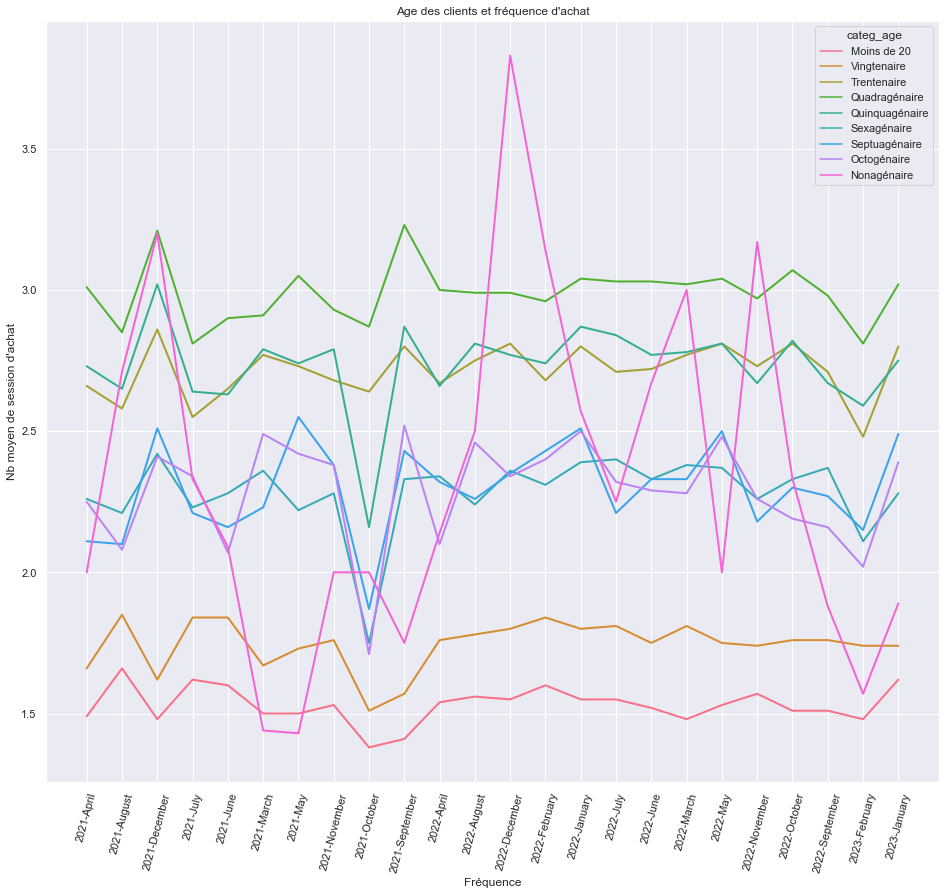

In [56]:
plt.figure(figsize=(16,14))
#sns.set_palette("PuBuGn_d")
sns.set_palette("husl")
sns.lineplot(x='date_month_format'
             ,y= 'moyenne_achat'
             ,hue='categ_age'
             ,data=age_frequence
             ,linewidth=2
            )
plt.xlabel('Fréquence')
plt.ylabel('Nb moyen de session d\'achat')
plt.title('Age des clients et fréquence d\'achat')
plt.xticks(rotation=75)
plt.show()

Globalement, on constate que les clients, par catégorie d'âge, ont un __comportement d'achat plutôt homogène sur la période.__ 

A l'exception des __nonagénaires__, dont le comportement est très variable: ceci étant, dans la mesure où ce groupe d'âge est minoritaire, son comportement hétérogène n'a pas d'impact sur le CA. 

On retrouve la __chute des ventes d'ocotobre 2021__ marquée pour la plupart des catégories d'âge, mais dans une moindre mesure pour les __trentenaires et quadragénaires__, catégories d'âge qui regroupent un grand nombre de clients. 

Pour faciliter la lecture, on peut réduire la précision et se contenter d'une fréquence d'achat lissée sur la période. 

In [57]:
age_frequence_lisse=data.groupby(['categ_age'])[['session_id','client_id']].nunique()
age_frequence_lisse=age_frequence_lisse.assign(moyenne_achat=round(age_frequence_lisse.session_id/age_frequence_lisse.client_id/24,2))
age_frequence_lisse.reset_index(inplace=True)


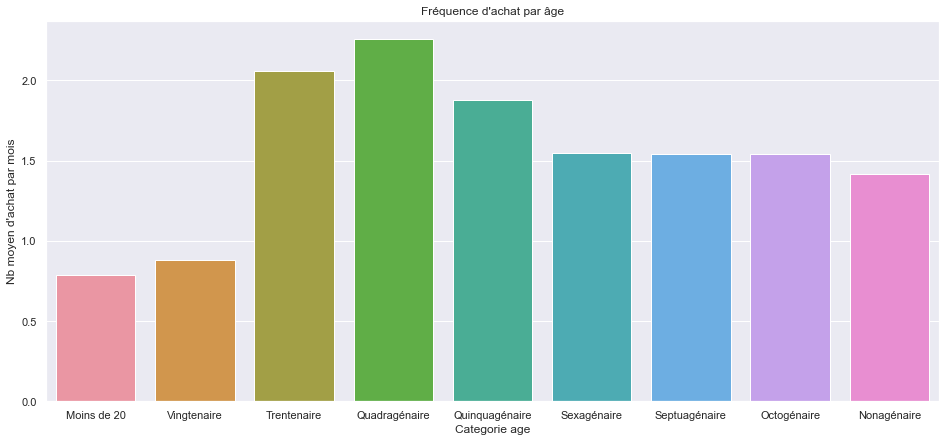

In [58]:
plt.figure(figsize=(16,7))
sns.barplot(data=age_frequence_lisse,x='categ_age', y='moyenne_achat')
plt.xlabel('Categorie age')
plt.ylabel('Nb moyen d\'achat par mois')
plt.title('Fréquence d\'achat par âge')
plt.show()

On constate que les __trentenaires et quadragénaires__ se distinguent par une fréquence d'achat plus importante (deux achats ou plus par mois), tandis que les __moins de trente ans__ ont la fréquence la plus faible, avec __moins d'un achat par mois__. 

## Age et panier moyen
<a id='age_et_panier'></a>
[Sommaire](#Sommaire)

On veut connaître la taille du panier moyen, c'est-à-dire __le nombre moyen d'articles par session d'achat__ pour les différentes catégories d'âge. 

In [93]:
nb_articles_panier=data.groupby(['categ_age','session_id'])['id_prod'].count().to_frame()
nb_articles_panier=nb_articles_panier.query('id_prod > 0')
nb_articles_panier.reset_index(inplace= True)
taille_panier=nb_articles_panier.groupby('categ_age').mean('id_prod')
taille_panier.reset_index(inplace= True)


On utilise __ANOVA (ANalysis Of VAriance)__ pour vérifier s'il y a une correlation entre l'âge des clients et le nombre moyen d'articles du panier. 

In [97]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(nb_articles_panier.categ_age,nb_articles_panier.id_prod)

0.11511394046175884

In [99]:
if eta_squared(nb_articles_panier.categ_age,nb_articles_panier.id_prod) >= 0.5:
	print('Le rapport de correlation indique que les moyennes se distinguent')
else:
	print('Le rapport de correlation indique que les moyennes ne se distinguent pas vraiment.')

Le rapport de correlation indique que les moyennes ne se distinguent pas vraiment.


On utilise un graphique pour __visualiser__ la distribution des paniers moyens par catégories d'âge. 

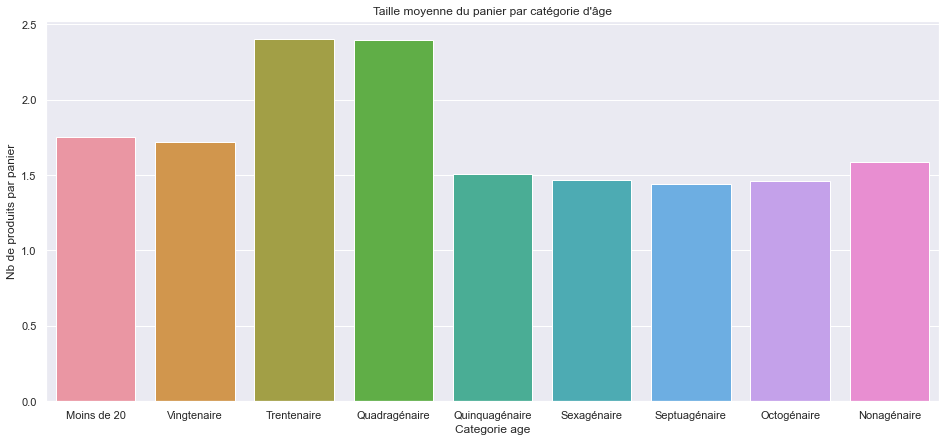

In [60]:
plt.figure(figsize=(16,7))
sns.barplot(data=taille_panier,x='categ_age', y='id_prod')
plt.xlabel('Categorie age')
plt.ylabel('Nb de produits par panier')
plt.title('Taille moyenne du panier par catégorie d\'âge')
plt.show()

On constate que, en moyenne, les __quadragénaires et les trentenaires__ ont des __paniers plus remplis__ que les autres tranches d'âge, avec __au moins deux produits__. 

Les __moins de 30 ans__ ont entre 1 et 2 produits par panier, et __plus souvent 2 que 1__. A l'inverse, les __50 ans et plus__, qui ont également entren 1 et 2 produits par panier, ont __plus souvent un seul produit plutôt que 2__. 

### Répartition du chiffre d'affaire entre les clients
<a id='CA_par_categ_client'></a>
[Sommaire](#Sommaire)

On veut connaître, par catégorie d'âge, la __proportion du chiffre d'affaire généré__.

In [61]:
# Clients regroupés par âge et sexe, en nombre et en pourcentage
group_clients=data.groupby(['sex','categ_age'])['client_id'].nunique().to_frame()
group_clients['pop_percent']=round(group_clients.client_id/group_clients.client_id.sum()*100,2)
                      
# Produits regroupés par CA généré
group_CA=data.groupby(['sex','categ_age'])['price'].sum().to_frame()
group_CA['price_percent']=round(group_CA.price/group_CA.price.sum()*100,2)

# Rassemblement des deux tables: on a, 
# pour chaque catégorie "âge et sexe", le chiffre d'affaire généré.
CA_clients=pd.merge(group_CA,group_clients, how='inner', on=['sex','categ_age'])
#CA_clients.info()

# Tri du CA par ordre croissant
CA_clients.sort_values(by='price',inplace=True)

# ajout de la colonne "Sommes cumulées"
CA_clients['sommes_cumul']=round(CA_clients.price.cumsum(axis=0),2)

# ajout de la colonne "Poucentage sommes cumulés"
CA_clients['price_percent_cumul']=round(CA_clients.price_percent.cumsum(axis=0),2)

# ajout d'une colonne qui cumul lespourcentages de population que représente chaque catégorie
CA_clients['pop_cumul']=round(CA_clients.pop_percent.cumsum(axis=0))

#CA_clients

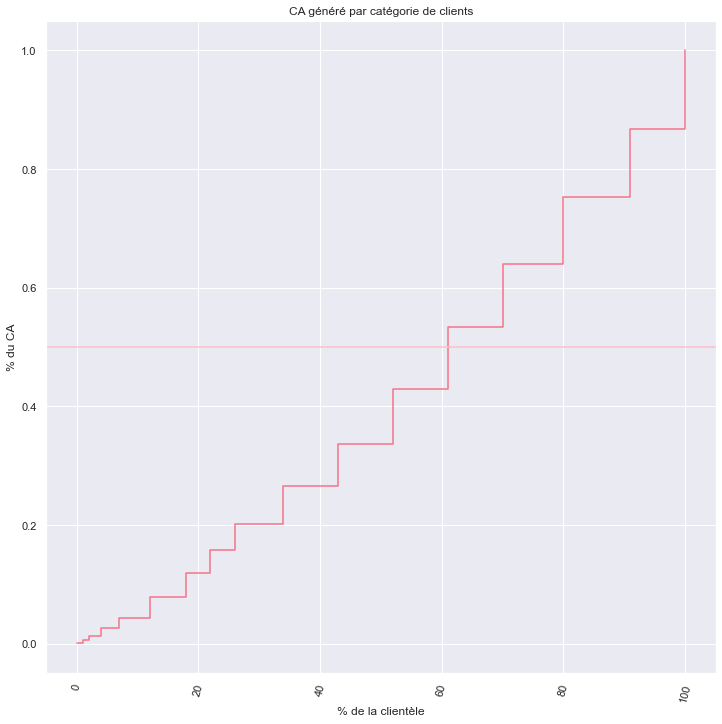

In [62]:
import numpy as np
lorenz = np.cumsum(np.sort(CA_clients.price)) / CA_clients.price.sum()
#lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

plt.figure(figsize=(12,12))
#plt.plot(np.linspace(0,1,len(lorenz)),lorenz,drawstyle='steps-post')
plt.plot(CA_clients['pop_cumul'],lorenz,drawstyle='steps-post')
plt.axhline(y=0.5,color= 'pink')
#plt.axvline(x=50,ymax=50,color= 'pink')
plt.xlabel('% de la clientèle')
plt.ylabel('% du CA')
plt.title('CA généré par catégorie de clients')
plt.xticks(rotation=75)
plt.show()

On constate que la répartition est __relativement égalitaire__: 60% de la clientèle génère 50% du chiffre d'affaire. 


In [63]:
n=len(CA_clients.price)
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('L\'indice de Gini est',gini,'.')

L'indice de Gini est 0.4478315176388976 .


L'indice de Gini trouvé est, arrondi, de 0.45, plus proche de 0 (égalité) que de 1 (inégalité). 

In [64]:
moitié_CA=CA_clients.price.sum()/2
CA_clients.query('sommes_cumul > @moitié_CA')

price  price_percent  client_id  pop_percent  \
sex categ_age                                                          
m   Vingtenaire    1240258.11          10.46        722         8.40   
    Trentenaire    1268141.59          10.70        816         9.49   
f   Trentenaire    1331091.28          11.23        834         9.70   
    Quadragénaire  1360118.98          11.47        899        10.45   
m   Quadragénaire  1577379.82          13.31        817         9.50   

                   sommes_cumul  price_percent_cumul  pop_cumul  
sex categ_age                                                    
m   Vingtenaire      6316997.01                53.29       61.0  
    Trentenaire      7585138.60                63.99       70.0  
f   Trentenaire      8916229.88                75.22       80.0  
    Quadragénaire   10276348.86                86.69       91.0  
m   Quadragénaire   11853728.68               100.00      100.0

En observant plus finement, on constate que les principaux acheteurs, c'est-à-dire  les 40% de la population qui sont responsables de 50% du chiffre d'affaire, sont consitués d'un __moindre nombre de catégories d'âge__: il s'agit des hommes vingtenaires, ainsi que de l'ensemble des trentenaires et quadragénaires.

# Probabilité d'achat
<a id='probabilite'></a>
[Sommaire](#Sommaire)

On répond ici à la question:

> "_J’aimerais donc que tu me calcules également la probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159."_





In [65]:
# Tous les clients ayant acheté la référence 2_159
clients_A=data.query('id_prod == "2_159"')

# Tous les clients ayant acheté la référence 0_525 et la référence 0_525
clients_AB=data.query('client_id in @clients_A.client_id & id_prod== "0_525"')

print(clients_A.client_id.nunique()
      ,'clients différents ont acheté le livre 2_159.'
     )
print('Parmi eux,'
      ,clients_AB.client_id.nunique()
      ,'ont également acheté le livre 0_525.')
print('La probabilité qu\'un client achète la référence 0_525 en ayant acheté la référence 2_159 est de'
     ,round(clients_AB.client_id.nunique()/clients_A.client_id.nunique()*100,2)
     ,'%.')

530 clients différents ont acheté le livre 2_159.
Parmi eux, 459 ont également acheté le livre 0_525.
La probabilité qu'un client achète la référence 0_525 en ayant acheté la référence 2_159 est de 86.6 %.


La probabilité d'acheter la référence 0_525 en ayant acheté la référence 2_159 est __importante: plus de 85%__. 

Notons qu'il s'agit de deux livres de catégories différentes (0 et 2): il faut donc s'intéresser de plus près à ces références pour comprendre leur lien.

Ceci est d'autant plus vrai que ces deux références ont été __achetées en plusieurs exemplaires par les mêmes clients__ .

# Conclusion et préconisations
<a id='conclusion'></a>
[Sommaire](#Sommaire)

## Synthèse des constats:

 - le chiffre d'affaire est __relativement stable__, avec cependant une chute importante en __octobre 2021__ . Cette baisse est principalement liée à la baisse des ventes de la catégorie 1 __principale contributrice du CA__, dont il faut comprendre la raison. 
 - 
 - Les hommes et les femmes ont des comportements d'achat similaires, c'est surtout la __catégorie d'âge__ qui influe sur le comportement. La majorité de la clientèle a __entre 20 et 49 ans__ et:
 
## Préconisations:

- Actuellement, la tranche d'âge qui contribue le plus au CA est celle des __30-49 ans__, par ses __achats fréquents de nombreux produits peu chers__. 
 
- Il serait pertinent d'améliorer l'offre destinée aux __moins de trente ans__, seconds contributeurs au CA, qui se distinguent par des __achats réguliers de petits paniers contenant des produits chers__. C'est la tranche d'âge dont l'augmentation de la fréquence d'achat et/ou de la taille du panier __aurait le plus d'influence sur le CA__. 
 